# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
'''
# using pandas
description = data.describe()[['MEDV']]
pd.reset_option('precision')
# print description

# TODO: Minimum price of the data
minimum_price = description.loc['min'].item()

# TODO: Maximum price of the data
maximum_price = description.loc['max'].item()

# TODO: Mean price of the data
mean_price = description.loc['mean'].item()

# TODO: Median price of the data
median_price = description.loc['50%'].item()

# TODO: Standard deviation of prices of the data
std_price = description.loc['std'].item() # 165,340.28
'''

# '''
# using numpy
minimum_price = np.min(data[['MEDV']]).item()
maximum_price = np.max(data[['MEDV']]).item()
mean_price = np.mean(data[['MEDV']]).item()
median_price = np.median(data[['MEDV']]).item()
std_price = np.std(data[['MEDV']]).item() # 165,171.13, using ddof=1 165,340.28
# '''

# numpy std <> pandas std (pandas uses unbiased std `n-1`)


# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** Using my intuition, I would guess that:
- 'RM' has a positive correlation with 'MEDV', because as the number of rooms increases, so does the area of the house, and, in most cases, so does the price.
- 'LSTAT' has a negative correlation with 'MEDV', because as the percentage of homeowners considered "lower class" increases, the prices will drop, since "lower class" homeowners can't afford expensive houses.
- 'PTRATIO' has a positive correlation with 'MEDV', because as the ratio students to teacher in primary and secondary schools increases, it means that there are more students in some region. More students of primary and secondary schools means that there are more families, and family houses tend to be more expensive, because they have more rooms and more area.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** I would consider that the model has successfully captured the variation of the target variable, because it has a coefficient of determination (R<sup>2</sup>) of 0.923, which means that in 92.3% of the cases, the model can explain the variability outside the mean.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** The benefit of splitting the dataset into training and testing subsets is to avoid *overfitting*. If we use all the data to train our model without splitting some test data to evaluate it against, the model can get very sensitive to the training data, getting very high prediction rates, but unable to generalize on data that has not been presented to it yet.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

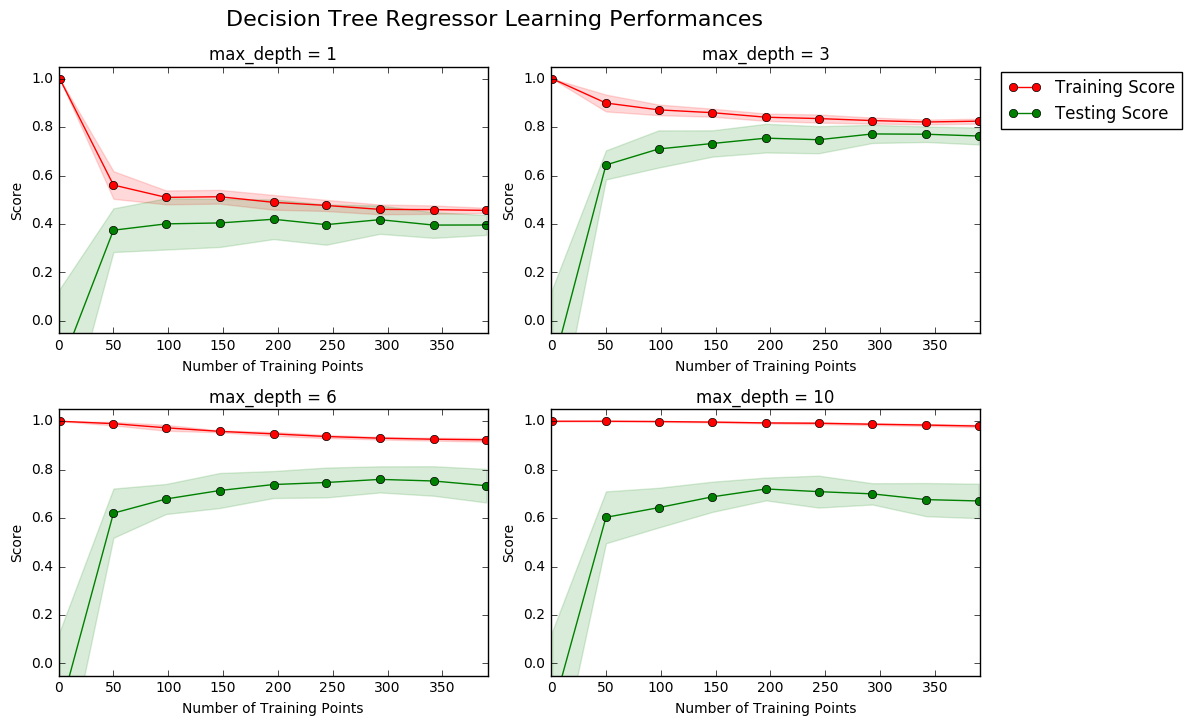

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** I chose the graph with Max Depth = 3. As more training points are added, the coefficient of determination (R<sup>2</sup>) of the training set dropped from 1.0 to almost 0.8. In contrast, the R<sup>2</sup> of the testing set increased from 0 to almost 0.8. We can see by the graph that both curves are converging to 0.8. Having more training points would have very little benefits to the model, since it has converged to 0.8.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

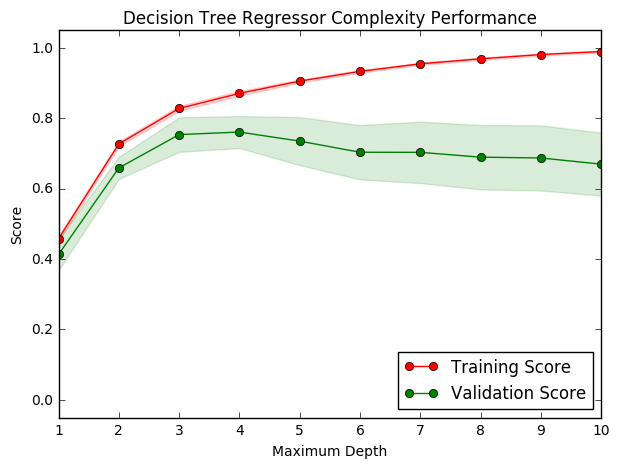

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
- The model with maximum depth of 1 suffers from high bias, because its score is very low, meaning that the model is oversimplified.
- The model with maximum depth of 10 suffers from high variance. It is overfitted to the training set. Its score predicting the test set is close to 1.0, but when presented to data outside the test set, it drops to ~0.63.
- The visual cues that help identifying high bias and high variance are, respectively: the position on the y-axis (the `score`) and the gap between the test curve and the validation curve.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** I would guess that maximum depth of 3 best generalizes to unseen data. My reasoning was:
- The highest score is Maximum depth of 4, but it has much more variance than maximum depth of 3. This means that 4 is more sensitive to the training set than 3, while 3 generalizes better on unseen data than 4.
- Maximum depth of 3 provides the second best score while minimizing the number of features and sensitivity to the training set. I think that it might be the most consistent model to generalize to unseen data.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

The grid search is a technique to estimate the best hyperparameters for a learning algorithm.
It consists of:
- an estimator
- a parameter space
- a method for searching and sampling candidates
- a cross-validation scheme and
- a scorer

Basically, grid search tests the estimator exhaustively with all combinations of parameters from the parameter space (or grid, hence *grid search*), running estimations on the cross-validation sets and evaluating the results using the scorer. At the end, it outputs the combination of parameters that produced the best score.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

The k-fold cross-validation is a technique to split data into training and testing sets to avoid bias and overfitting. The data set is split into k partitions. Then, one of these partitions is selected as the test data, while the others k-1 partitions are used as training data. The training and validation takes place and then the process repeat itself, selecting another partition as the test data.

The benefits it provides to grid search are:
1. The grid search will be able to train and test using all the data available in order to find the best hyperparameters for the model.
2. The k-fold allows us to control the tradeoff between bias and variance. This is done by increasing or decreasing the k-value. High k means high bias and low variance. Lower k means low bias and high variance.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth": range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

In question 6, I guessed that the optimal model was `max_depth = 3`. Knowing that the grid search will select the parameters that maximize (*or minimize*) the score, it was no surprise it selected `max_depth = 4` as the optimal model.

As I wrote on my answer for question 6, I understand that `max_depth = 4` has the best score, but the marginal score gain over `max_depth = 3` is too small in face of the high variance gain. I am unsure about which will provide the better modeling.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    
print ""
print "Median price: ${:,.2f}".format(np.mean(data[['MEDV']]).item())
print "Std price: ${:,.2f}".format(np.std(data[['MEDV']]).item())
print "Minimum price: ${:,.2f}".format(np.min(data[['MEDV']]).item())
print "Maximum price: ${:,.2f}".format(np.max(data[['MEDV']]).item())
print "Number of rooms (median): {:,.0f}".format(np.mean(data[['RM']]).item())
print "Number of rooms (std): {:,.0f}".format(np.std(data[['RM']]).item())
print "Lower Class (median): {:,.2f}%".format(np.mean(data[['LSTAT']]).item())
print "Lower Class (std): {:,.2f}%".format(np.std(data[['LSTAT']]).item())
print "Student-teacher ratio (median): {:,.0f}-to-1".format(np.mean(data[['PTRATIO']]).item())
print "Student-teacher ratio (std): {:,.0f}-to-1".format(np.std(data[['PTRATIO']]).item())

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36

Median price: $454,342.94
Std price: $165,171.13
Minimum price: $105,000.00
Maximum price: $1,024,800.00
Number of rooms (median): 6
Number of rooms (std): 1
Lower Class (median): 12.94%
Lower Class (std): 7.07%
Student-teacher ratio (median): 19-to-1
Student-teacher ratio (std): 2-to-1


**Answer: **

Prices are reasonable. Here is the detailed analysis.
- Client 1: 
   - House has 5 rooms, which is 1 standard deviation below the mean (6 rooms minus 1)
   - Neighborhood has 17% poverty level, which is less than 1 standard deviation above the mean (12.94% plus 7.07%)
   - Neighborhood has 15-to-1 student to teacher ratio, which is 2 standard devations below the mean (19-to-1 minus 4-to-1)
   - House was evaluated at `$`403,025.00, which is slightly below the mean (`$`454,342.94)
   - Given that this house compared to the *mean house* has less rooms, more poverty level and less students to teacher ratio, it was expected that its price would be close to but below the mean price.
   
   
- Client 2:
   - House has 4 rooms, which is 2 standard deviations below the mean (6 rooms minus 2)
   - Neighborhood has 32% poverty level, which is almost 3 standard deviations above the mean (12.94% plus 21.21%)
   - Neighborhood has 22-to-1 student to teacher ratio, which is 1.5 standard deviations above the mean (19-to-1 plus 3-to-1)
   - House was evaluated at `$`237,478.72, which is close to 1.3 standard deviations below the mean (`$`454,342.94 minus `$`216,864.22)
   - Given that this house compared to the *mean house* has less rooms, more poverty level and more students to teacher ratio, it was expected that its price would be somewhere below the mean price.
   
   
- Client 3:
   - House has 8 rooms, which is 2 standard deviations above the mean (6 rooms plus 2)
   - Neighborhood has 3% poverty level, which is close to 1.5 standard deviations below the mean (12.94% minus 10.61%)
   - Neighborhood has 12-to-1 student to teacher ratio, which is 3.5 standard deviations below the mean (19-to-1 minus 7-to-1)
   - House was evaluated at `$`931,636.36, which is close to 2.9 standard deviations above the mean (`$`454,342.94 plus `$`478,996.28)
   - Given that this house compared to the *mean house* has more rooms, less poverty level and less students to teacher ratio, it was expected that its price would be somewhere above the mean price.
   
And overall, all the estimated prices are between the minimum and maximum house prices from the data set.


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The constructed model should not be used in a real-world setting.

The problems regarding this model are:
- The data was collected in 1978 and is not relevant to the current housing market.
    - The scaling used to account for inflation introduces errors, since correcting for inflation over 38 years will not be a precise scaling.
    - Housing market prices are greatly affected by various social indicators like unemployment, health services, crime rate, etc. None of these indicators were taken into account by the model, and most of them will change significantly over the course of 38 years.

- The features presented by the data are insufficient to describe a home in 2016. Home listings today include features like: living space, appliances, decoration, garage/parking, bedrooms, bathrooms, kitchens, etc.

- The model is not robust enough to make consistent predictions. As we saw above, training the model with different data 10 times in a row, and making predictions for the same client, resulted in a variance of `$`69K (~17`%` of the mean value), between the lowest and the highest value.

- And because Boston is an urban city and the model was trained exclusively with Boston's data, the resulting model is not applicable to rural cities.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.